# Regressionsanalyse Powerlifting 

## Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

## Data

In [2]:
rawdata = pd.read_csv("Data.csv")
rawdata.head()

,playerId,Name,Sex,Equipment,Age,BodyweightKg,BestSquatKg,BestDeadliftKg
0,19391.0,Carlos Ceron,M,Raw,23.0,87.30,205.0,235.0
1,15978.0,Tito Herrera,M,Wraps,23.0,73.48,220.0,260.0
2,27209.0,Levi Lehman,M,Raw,26.0,112.40,142.5,220.0
3,27496.0,Stacy Hayford,F,Raw,35.0,59.42,95.0,102.5
4,20293.0,Brittany Hirt,F,Raw,26.5,61.40,105.0,127.5


### Visualisierung der Daten

In [3]:
# Anzahl der Einträge ausgeben
num_entries = rawdata.shape[0]
print("Anzahl der Einträge in Rawdata:", num_entries)

# Eindeutige Kategorien ausgeben
unique_categories = rawdata["Equipment"].unique()
print("Kategorien in der Spalte von Eqipment:", unique_categories)  

# Überprüfen ob Diverse Geschlechter inkludiert sind
unique_categories = rawdata["Sex"].unique()
print("Kategorien in der Spalte von Eqipment:", unique_categories)  

# Altersspanne berechnen
print("Altersspanne der Teilnehmer:", rawdata["Age"].min(), "-", rawdata["Age"].max())

# Altersspanne berechnen
print("Körpergewicht der Teilnehmer:", rawdata["BodyweightKg"].min(), "-", rawdata["BodyweightKg"].max())

Anzahl der Einträge in Rawdata: 18900
Kategorien in der Spalte von Eqipment: ['Raw' 'Wraps' 'Single-ply' 'Multi-ply']
Kategorien in der Spalte von Eqipment: ['M' 'F']
Altersspanne der Teilnehmer: 7.0 - 83.0
Körpergewicht der Teilnehmer: 26.13 - 201.0


Erläuterung des Equipments:<br>
__Raw__ = Powerlifter verwenden kein Equipment<br>__Wraps__ = Athleten verwenden spezielle Bandagen für zusätzliche Stabilität an Knie oder Handgelenken <br>__Single-ply__ = Athleten tragen vollständige Ausrüstung, jedoch ist jede Schicht auf eine begrenzt.<br>__Multi-ply__ = Athleten tragen vollständige Ausrüstung mit mehreren erlaubten Schichten für maximale Unterstützung.



## Datenverarbeitung

### Fehlende Werte

In [4]:

# Überprüfen auf fehlende Werte
print(rawdata.isnull().sum())
num_entries = rawdata.shape[0]
print("Anzahl der Einträge in Rawdata:", num_entries, "\n")

# Da weniger als 1% der Daten unvollstänidg sind = Zeilen löschen
rawdata = rawdata.dropna(axis=0)

# Wiederholtes Überprüfen auf fehlende Werte
print(rawdata.isnull().sum())
num_entries = rawdata.shape[0]
print("Anzahl der Einträge in Rawdata:", num_entries, "\n")


playerId            0
Name                0
Sex                 0
Equipment           0
Age               175
BodyweightKg        0
BestSquatKg         0
BestDeadliftKg      0
dtype: int64
Anzahl der Einträge in Rawdata: 18900 

playerId          0
Name              0
Sex               0
Equipment         0
Age               0
BodyweightKg      0
BestSquatKg       0
BestDeadliftKg    0
dtype: int64
Anzahl der Einträge in Rawdata: 18725 



### Sonderfall BestSquatKg

In [5]:

#Identifizierung der Einträge mit nicht-numerischen Werten in "BestSquatKg"
#coerce erläutern
non_numeric_entries = pd.to_numeric(rawdata['BestSquatKg'], errors='coerce').isna()

#Ausgabe der fehlerhaften Einträge
print(rawdata[non_numeric_entries][['playerId', 'BestSquatKg']],"\n")

#Korrektur der fehlerhaften Einträge, indem der doppelte Punkt durch einen einzigen ersetzt wird
rawdata['BestSquatKg'] = rawdata['BestSquatKg'].str.replace('..', '.', regex=False)

#Konvertierung der korrigierten Spalte in einen numerischen Typ
rawdata['BestSquatKg'] = pd.to_numeric(rawdata['BestSquatKg'])

#Ausgabe der fehlerhaften Einträge
print(rawdata[non_numeric_entries][['playerId', 'BestSquatKg']],"\n")


count_of_negative_rows = (rawdata['BestSquatKg'] < 0).sum()
print("Anzahl der Zeilen mit negativen Werten in 'BestSquatKg':", count_of_negative_rows)



#Umwandlung negativer Werte in "BestSquatKg" in positive durch Anwendung des absoluten Wertes, da wir vermuten dass es sich hier um Vorzeichen fehler handelt
#rawdata['BestSquatKg'] = rawdata['BestSquatKg'].abs()











       playerId BestSquatKg
94      11462.0      102..5
1614    21517.0      227..5
1663    12116.0      133..0
1720    28706.0      192..5
1766    23256.0      105..0
2590    12648.0      195..0
2803    20917.0      237..5
4213     1659.0      122..5
9712    24353.0      295..0
12138   17751.0      180..0
12429   16459.0      205..0
12445   14456.0      110..0
12664   13558.0      220..0
16998     545.0      145..0
18527    5539.0      207..5 

       playerId  BestSquatKg
94      11462.0        102.5
1614    21517.0        227.5
1663    12116.0        133.0
1720    28706.0        192.5
1766    23256.0        105.0
2590    12648.0        195.0
2803    20917.0        237.5
4213     1659.0        122.5
9712    24353.0        295.0
12138   17751.0        180.0
12429   16459.0        205.0
12445   14456.0        110.0
12664   13558.0        220.0
16998     545.0        145.0
18527    5539.0        207.5 

Anzahl der Zeilen mit negativen Werten in 'BestSquatKg': 82


### Außreißer

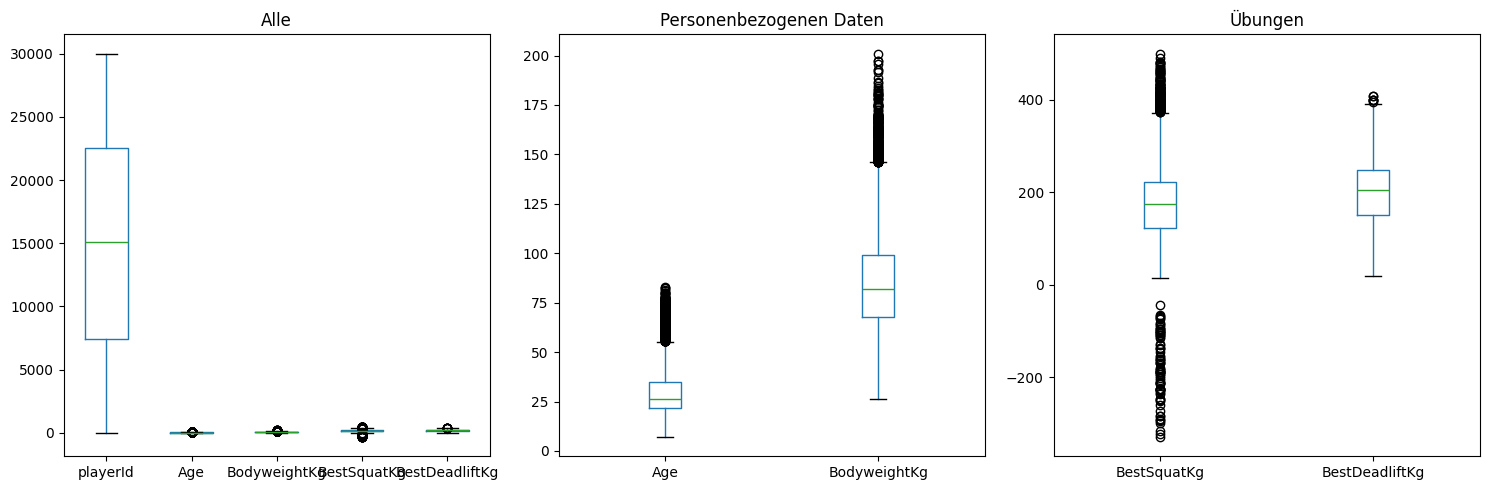

'\nsns.set_style("whitegrid")\nsns.boxplot(data=rawdata[\'Age\'])\n'

In [6]:
## Visualisieren der Ausreißer

#Formatierung
plt.figure(figsize=(15, 5))

#Subplot = Alle
plt.subplot(1, 3, 1)
rawdata.boxplot(grid=False)
plt.title('Alle')

#Subplot = Personenbezogenen Daten
plt.subplot(1, 3, 2)
rawdata.boxplot(column=['Age', 'BodyweightKg'], grid=False)
plt.title('Personenbezogenen Daten')

#Subplot = Übungen
plt.subplot(1, 3, 3)
rawdata.boxplot(column=['BestSquatKg', "BestDeadliftKg"], grid=False)
plt.title('Übungen')

"""
#rawdata.drop('PlayerID', axis=1).boxplot(grid=False)

plt.subplot(1, 3, 4)
rawdata.boxplot(column=['Age', 'BodyweightKg','BestSquatKg', 'BestDeadliftKg'], grid=False)
plt.title('Daten')
"""
plt.tight_layout()
plt.show()

"""
sns.set_style("whitegrid")
sns.boxplot(data=rawdata['Age'])
"""

In [7]:
## Umgang mit Außreißer
""""
Q1 = rawdata['PRICE'].quantile(q=0.25, interpolation='midpoint')
Q3 = rawdata['PRICE'].quantile(q=0.75, interpolation='midpoint')
IQR = Q3 - Q1
print('Interquartile range: ', round(IQR, 2))
"""

'"\nQ1 = rawdata[\'PRICE\'].quantile(q=0.25, interpolation=\'midpoint\')\nQ3 = rawdata[\'PRICE\'].quantile(q=0.75, interpolation=\'midpoint\')\nIQR = Q3 - Q1\nprint(\'Interquartile range: \', round(IQR, 2))\n'